In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

sns.set()

#from mlxtend.plotting import plot_decision_regions
#import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
diabetes_df = pd.read_csv('diabetes.csv')
display(diabetes_df.head())  # Displays top 5 values
display(diabetes_df.columns)  # Displays the columns available
display(diabetes_df.info())  # Information about the type of data
display(diabetes_df.isnull().head(10))  # Checks for null values
display(diabetes_df.isnull().sum())  # Checks how many null values are there


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
diabetes_df_copy = diabetes_df.copy(deep=True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)
print(diabetes_df_copy.isnull().sum())


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


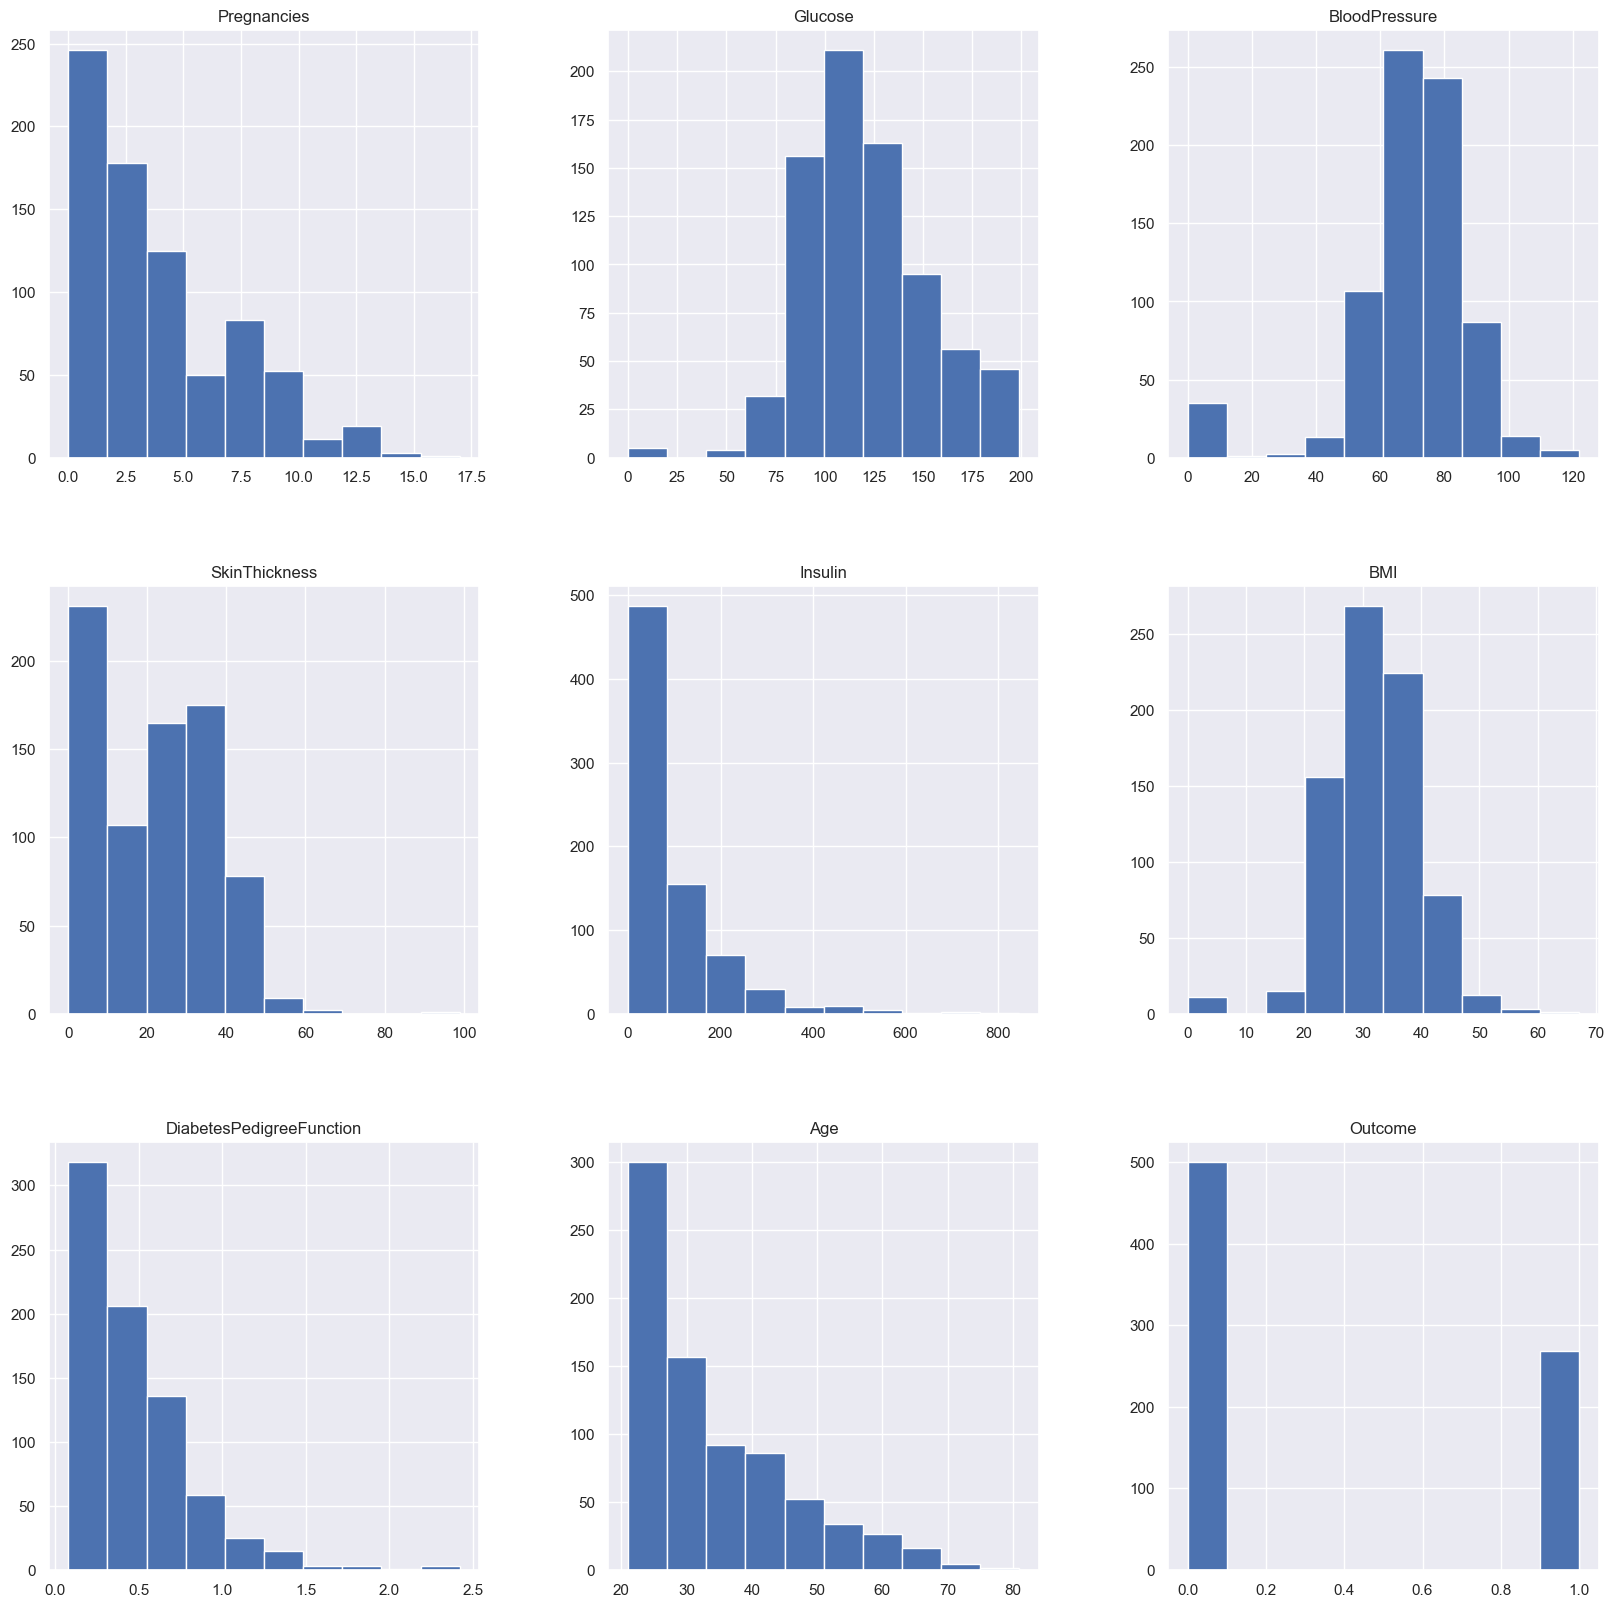

In [5]:
p = diabetes_df.hist(figsize=(20, 20))  # Creates a histogram before removing null values
plt.show()

In [6]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)


In [7]:
#randomforest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Random forest values")
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))


Accuracy_Score = 1.0
Random forest values
Accuracy_Score = 0.7480314960629921
[[133  29]
 [ 35  57]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       162
           1       0.66      0.62      0.64        92

    accuracy                           0.75       254
   macro avg       0.73      0.72      0.72       254
weighted avg       0.74      0.75      0.75       254



In [8]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
print("Decision tree values")
print("Accuracy Score =", format(metrics.accuracy_score(y_test, predictions)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Decision tree values
Accuracy Score = 0.7047244094488189
[[129  33]
 [ 42  50]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       162
           1       0.60      0.54      0.57        92

    accuracy                           0.70       254
   macro avg       0.68      0.67      0.67       254
weighted avg       0.70      0.70      0.70       254



In [9]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("xgboost values")
print("Accuracy Score =", format(metrics.accuracy_score(y_test, xgb_pred)))


xgboost values
Accuracy Score = 0.7283464566929134


In [10]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
print("SVM Values")
print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

SVM Values
Accuracy Score = 0.7480314960629921
[[145  17]
 [ 47  45]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       162
           1       0.73      0.49      0.58        92

    accuracy                           0.75       254
   macro avg       0.74      0.69      0.70       254
weighted avg       0.74      0.75      0.73       254



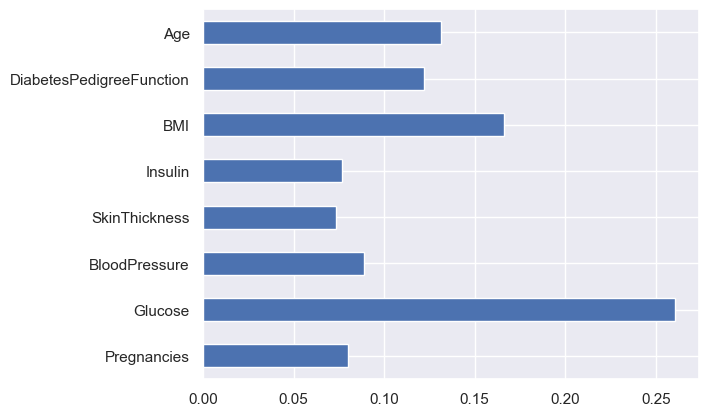

In [11]:
(pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh'))
plt.show()

In [12]:
import pickle
saved_model = pickle.dumps(rfc)
rfc_from_pickle = pickle.loads(saved_model)
rfc_from_pickle.predict(X_test)

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [ ]:
#display(rfc.predict([[0,137,40,35,168,43.1,2.228,33]]))  # 5th patient
#display(rfc.predict([[10,101,76,48,180,32.9,0.171,63]]))  # 763th patient

print("Enter patient data")
p=input("enter pregnancies:")
g=input("enter glucose:")
bp=input("enter blood pressure:")
st=input("enter skin thickness:")
i=input("enter insulin:")
bmi=input("enter BMI:")
dpf=input("enter diabetesprediction function:")
a=input("enter age:")
display(rfc.predict([[p,g,bp,st,i,bmi,dpf,a]])) 


Enter patient data
